In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

In [2]:
# Generate synthetic multivariate time series data
time_steps = 50
sensor_1 = np.sin(np.linspace(0, 2 * np.pi, time_steps)) + np.random.normal(0, 0.1, time_steps)
sensor_2 = np.cos(np.linspace(0, 2 * np.pi, time_steps)) + np.random.normal(0, 0.1, time_steps)
sensor_3 = np.sin(2 * np.linspace(0, 2 * np.pi, time_steps)) + np.random.normal(0, 0.1, time_steps)

# Combine into single array
data = np.vstack([sensor_1, sensor_2, sensor_3]).T

# Convert to PyTorch tensor
data_tensor = torch.tensor(data, dtype=torch.float32)

In [13]:
data_tensor[1:5,0:3]

tensor([[0.1679, 1.0305, 0.1189],
        [0.3515, 0.9162, 0.3637],
        [0.5994, 0.8089, 0.7926],
        [0.6775, 0.8685, 0.7378]])

In [23]:
# Concatenate the data into a single-channel time series
single_channel_data = data_tensor.reshape(1, 1, -1)

# Define a 1D convolutional layer with one kernel
conv1d_single_channel = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=5, stride=1)

# Apply convolution
output_single_channel = conv1d_single_channel(single_channel_data)

print("Single-Channel Convolution Output Shape:", output_single_channel.shape)


Single-Channel Convolution Output Shape: torch.Size([1, 1, 46])


In [24]:
output_single_channel

tensor([[[ 0.2081,  0.0817, -0.0362, -0.1320, -0.1530, -0.1381, -0.2644,
          -0.2692, -0.3461, -0.4409, -0.4842, -0.5312, -0.4783, -0.4847,
          -0.4963, -0.4888, -0.4927, -0.3125, -0.2023, -0.1228, -0.0242,
          -0.1177, -0.0280,  0.1087,  0.1853,  0.3995,  0.3802,  0.4329,
           0.4506,  0.5487,  0.7243,  0.8519,  0.9872,  1.0270,  0.9332,
           0.9068,  0.8940,  0.9370,  1.0025,  1.0723,  1.0517,  0.9635,
           0.8458,  0.7336,  0.7422,  0.6688]]],
       grad_fn=<ConvolutionBackward0>)

In [17]:
# Treat each sensor as a separate channel
multi_channel_data = data_tensor.reshape(1, 3, -1)

# Define a 1D convolutional layer with one kernel
conv1d_multi_channel = torch.nn.Conv1d(in_channels=3, out_channels=1, kernel_size=3, stride=1)

# Apply convolution
output_multi_channel = conv1d_multi_channel(multi_channel_data)

print("Multi-Channel Convolution Output Shape:", output_multi_channel.shape)

Multi-Channel Convolution Output Shape: torch.Size([1, 1, 48])


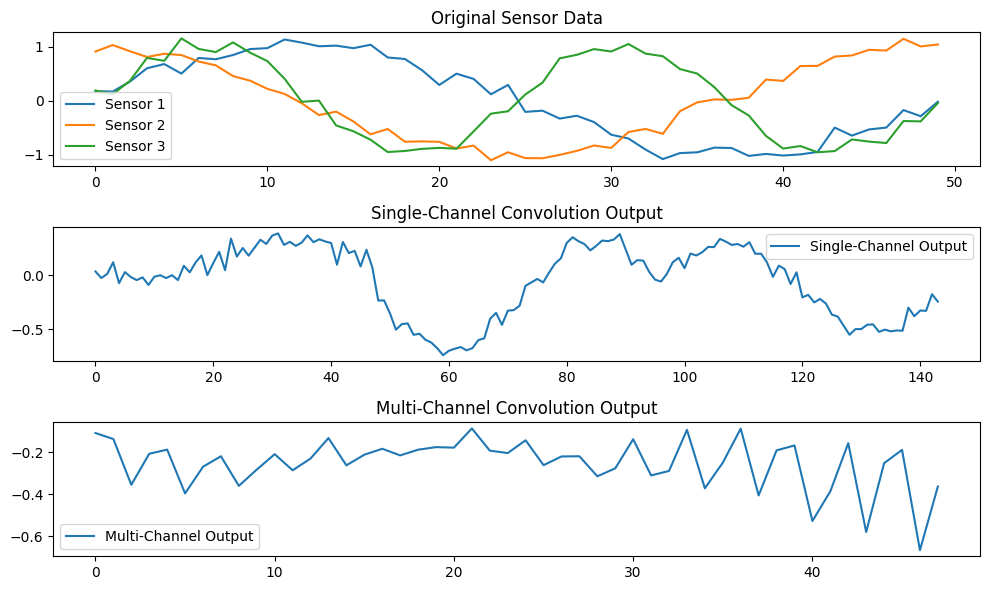

In [21]:
# Plot the original data
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(sensor_1, label='Sensor 1')
plt.plot(sensor_2, label='Sensor 2')
plt.plot(sensor_3, label='Sensor 3')
plt.title('Original Sensor Data')
plt.legend()

# Plot the single-channel convolution output
plt.subplot(3, 1, 2)
plt.plot(output_single_channel.detach().numpy().flatten(), label='Single-Channel Output')
plt.title('Single-Channel Convolution Output')
plt.legend()

# Plot the multi-channel convolution output
plt.subplot(3, 1, 3)
plt.plot(output_multi_channel.detach().numpy().flatten(), label='Multi-Channel Output')
plt.title('Multi-Channel Convolution Output')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
output_single_channel

tensor([[[ 0.0370, -0.0239,  0.0150,  0.1222, -0.0709,  0.0312, -0.0146,
          -0.0429, -0.0173, -0.0882, -0.0117,  0.0022, -0.0242,  0.0023,
          -0.0429,  0.0895,  0.0293,  0.1208,  0.1858,  0.0030,  0.1153,
           0.2194,  0.0490,  0.3420,  0.1753,  0.2545,  0.1835,  0.2567,
           0.3312,  0.2923,  0.3699,  0.3897,  0.2832,  0.3119,  0.2744,
           0.3045,  0.3717,  0.3087,  0.3353,  0.3152,  0.3009,  0.1000,
           0.3103,  0.2079,  0.2279,  0.0836,  0.2379,  0.0741],
         [-0.2323, -0.2312, -0.3522, -0.5023, -0.4512, -0.4442, -0.5501,
          -0.5402, -0.5953, -0.6215, -0.6733, -0.7389, -0.6977, -0.6788,
          -0.6633, -0.6940, -0.6730, -0.5987, -0.5825, -0.4009, -0.3467,
          -0.4578, -0.3260, -0.3213, -0.2804, -0.0957, -0.0644, -0.0320,
          -0.0646,  0.0268,  0.1098,  0.1582,  0.3022,  0.3543,  0.3173,
           0.2910,  0.2329,  0.2741,  0.3235,  0.3180,  0.3329,  0.3835,
           0.2410,  0.0998,  0.1427,  0.1367,  0.0325, -0.0

Single-Channel Convolution with Multiple Filters Output Shape: torch.Size([1, 3, 48])


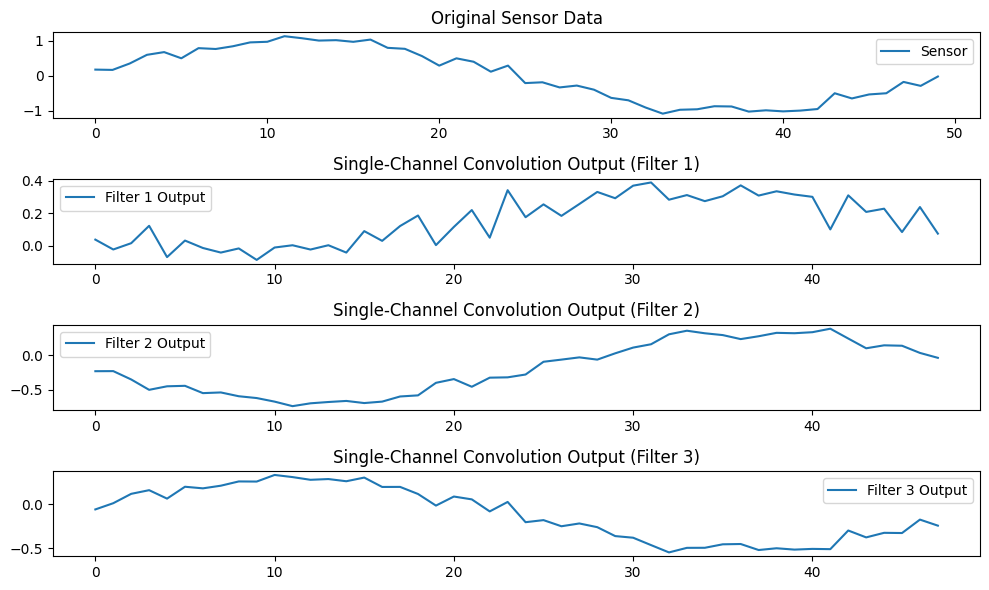

In [20]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Generate synthetic univariate time series data
time_steps = 50
sensor = np.sin(np.linspace(0, 2 * np.pi, time_steps)) + np.random.normal(0, 0.1, time_steps)

# Convert to PyTorch tensor
data_tensor = torch.tensor(sensor, dtype=torch.float32)

# Single-Channel Convolution with Multiple Filters
# Treat the data as a single-channel time series
single_channel_data = data_tensor.view(1, 1, -1)

# Define a 1D convolutional layer with three filters
conv1d_single_channel = torch.nn.Conv1d(in_channels=1, out_channels=3, kernel_size=3, stride=1)

# Apply convolution
output_single_channel = conv1d_single_channel(single_channel_data)

print("Single-Channel Convolution with Multiple Filters Output Shape:", output_single_channel.shape)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(sensor, label='Sensor')
plt.title('Original Sensor Data')
plt.legend()

# Plot the single-channel convolution output
for i in range(3):
    plt.subplot(4, 1, i + 2)
    plt.plot(output_single_channel.detach().numpy()[0, i, :], label=f'Filter {i+1} Output')
    plt.title(f'Single-Channel Convolution Output (Filter {i+1})')
    plt.legend()

plt.tight_layout()
plt.show()


Shape of one-hot encoded review tensor: torch.Size([1, 27, 12])
One-hot encoded review tensor:
 tensor([[[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
         [0., 0., 0

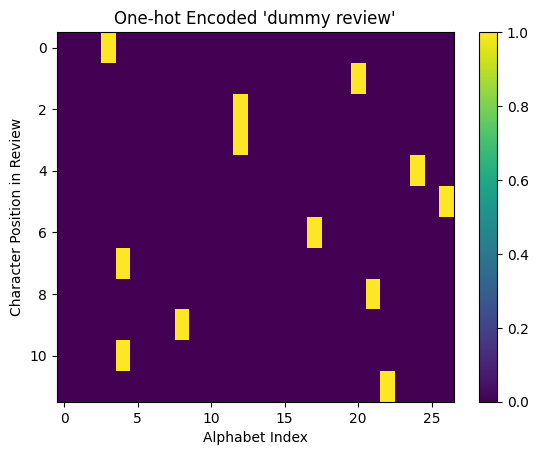

In [25]:
import numpy as np
import torch

# Step 1: Define the alphabet and create a mapping from characters to indices
alphabet = "abcdefghijklmnopqrstuvwxyz "
char_to_index = {char: idx for idx, char in enumerate(alphabet)}

# Step 2: Encode the text review into one-hot vectors
def text_to_one_hot(text, alphabet_size):
    one_hot_vectors = np.zeros((len(text), alphabet_size), dtype=np.float32)
    for i, char in enumerate(text):
        if char in char_to_index:
            index = char_to_index[char]
            one_hot_vectors[i, index] = 1.0
    return one_hot_vectors

# Example text review
text_review = "dummy review"

# Encode the text review
alphabet_size = len(alphabet)
one_hot_encoded_review = text_to_one_hot(text_review, alphabet_size)

# Step 3: Represent the data as a 1D signal with depth = size of the alphabet
# Convert to PyTorch tensor
one_hot_encoded_review_tensor = torch.tensor(one_hot_encoded_review)

# Reshape to 1D signal with depth = size of the alphabet
# The shape will be (1, depth, sequence_length)
one_hot_encoded_review_tensor = one_hot_encoded_review_tensor.view(1, alphabet_size, -1)

# Print the shape of the tensor
print("Shape of one-hot encoded review tensor:", one_hot_encoded_review_tensor.shape)

# Print the tensor to see the one-hot encoding
print("One-hot encoded review tensor:\n", one_hot_encoded_review_tensor)

# Additional: Visualize the one-hot encoded review
import matplotlib.pyplot as plt

plt.imshow(one_hot_encoded_review, aspect='auto', cmap='viridis')
plt.colorbar()
plt.title("One-hot Encoded 'dummy review'")
plt.xlabel("Alphabet Index")
plt.ylabel("Character Position in Review")
plt.show()


Shape of convolution output tensor: torch.Size([1, 1, 10])


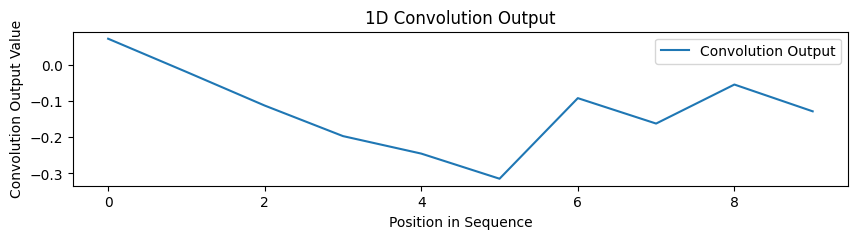

In [26]:
# Step 4: Define and apply 1D convolution
# Define a 1D convolutional layer with kernel size 3
conv1d = torch.nn.Conv1d(in_channels=alphabet_size, out_channels=1, kernel_size=3, stride=1)

# Apply convolution
conv_output = conv1d(one_hot_encoded_review_tensor)

# Print the shape of the convolution output tensor
print("Shape of convolution output tensor:", conv_output.shape)

# Convert convolution output tensor to numpy for visualization
conv_output_np = conv_output.detach().numpy().squeeze()

# Plot the convolution output
plt.figure(figsize=(10, 2))
plt.plot(conv_output_np, label='Convolution Output')
plt.title("1D Convolution Output")
plt.xlabel("Position in Sequence")
plt.ylabel("Convolution Output Value")
plt.legend()
plt.show()

In [29]:
conv_output.grad()

C:\Users\esual\AppData\Local\Temp\ipykernel_79068\559758285.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten\src\ATen/core/TensorBody.h:494.)
  conv_output.grad()


TypeError: 'NoneType' object is not callable

In [30]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Define the alphabet and create a mapping from characters to indices
alphabet = "abcdefghijklmnopqrstuvwxyz "
char_to_index = {char: idx for idx, char in enumerate(alphabet)}

# Step 2: Encode the text review into one-hot vectors
def text_to_one_hot(text, alphabet_size):
    one_hot_vectors = np.zeros((len(text), alphabet_size), dtype=np.float32)
    for i, char in enumerate(text):
        if char in char_to_index:
            index = char_to_index[char]
            one_hot_vectors[i, index] = 1.0
    return one_hot_vectors

# Example text review
text_review = "dummy review"

# Encode the text review
alphabet_size = len(alphabet)
one_hot_encoded_review = text_to_one_hot(text_review, alphabet_size)

# Step 3: Represent the data as a 1D signal with depth = size of the alphabet
# Convert to PyTorch tensor
one_hot_encoded_review_tensor = torch.tensor(one_hot_encoded_review)

# Reshape to 1D signal with depth = size of the alphabet
# The shape will be (1, depth, sequence_length)
one_hot_encoded_review_tensor = one_hot_encoded_review_tensor.view(1, alphabet_size, -1)

# Print the shape of the tensor
print("Shape of one-hot encoded review tensor:", one_hot_encoded_review_tensor.shape)

# Step 4: Define and apply 1D convolution
# Define a 1D convolutional layer with kernel size 3
conv1d = torch.nn.Conv1d(in_channels=alphabet_size, out_channels=1, kernel_size=3, stride=1)

# Initialize weights and biases for demonstration
conv1d.weight.data.fill_(0.1)
conv1d.bias.data.fill_(0.1)

# Apply convolution
conv_output = conv1d(one_hot_encoded_review_tensor)

# Print the shape of the convolution output tensor
print("Shape of convolution output tensor:", conv_output.shape)

# Step 5: Define a target and loss function
# Create a target tensor with the same shape as conv_output
target = torch.ones_like(conv_output)

# Define a mean squared error loss function
loss_fn = torch.nn.MSELoss()

# Compute the loss
loss = loss_fn(conv_output, target)

# Step 6: Compute gradients
# Zero the gradients before backward pass
conv1d.zero_grad()

# Perform backward pass to compute gradients
loss.backward()

# Print the gradients
print("Gradients of the weights:\n", conv1d.weight.grad)
print("Gradients of the biases:\n", conv1d.bias.grad)

# Optional: Define an optimizer and perform a single optimization step
optimizer = torch.optim.SGD(conv1d.parameters(), lr=0.01)
optimizer.step()

# Verify that the weights have been updated
print("Updated weights:\n", conv1d.weight.data)
print("Updated biases:\n", conv1d.bias.data)


Shape of one-hot encoded review tensor: torch.Size([1, 27, 12])
Shape of convolution output tensor: torch.Size([1, 1, 10])
Gradients of the weights:
 tensor([[[-0.1400, -0.1600, -0.1400],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000, -0.0600],
         [ 0.0000,  0.0000,  0.0000],
         [-0.1400, -0.1200, -0.1400],
         [ 0.0000,  0.0000,  0.0000],
         [-0.0600, -0.1200, -0.1200],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [-0.1400,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [-0.1200, -0.1400, -0.1400],
         [ 0.0000,  0.0000, -0.0600],
         [ 0.0000,  0.0000,  0.0000],
         [-0.1400, -0.1400,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [-0.0600, -0.1200, -0.1200],
         [ 0.0000,  0.0000, -0.0600],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0

Input Sequence: tensor([[[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
          15.]]])
Dilated Convolution Output: tensor([[[12., 15., 18., 21., 24., 27., 30., 33., 36.]]],
       grad_fn=<ConvolutionBackward0>)


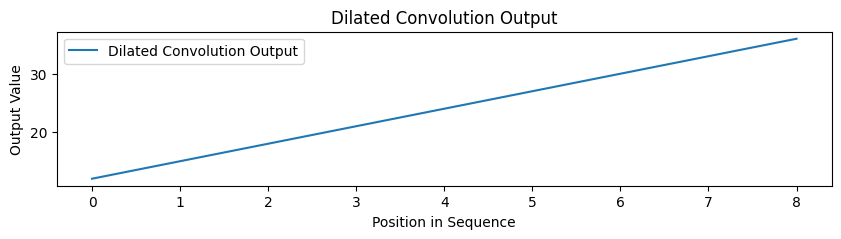

In [35]:
# Dilation

import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Define a 1D input sequence
input_sequence = torch.tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]], dtype=torch.float32).view(1, 1, -1)

# Define a 1D convolutional layer with dilation
conv1d_dilated = torch.nn.Conv1d(in_channels=1, out_channels=1, kernel_size=3, stride=1, dilation=3)

# Initialize weights for demonstration purposes
conv1d_dilated.weight.data.fill_(1)
conv1d_dilated.bias.data.fill_(0)

# Apply dilated convolution
dilated_output = conv1d_dilated(input_sequence)

# Print the input and output
print("Input Sequence:", input_sequence)
print("Dilated Convolution Output:", dilated_output)

# Visualize the output
plt.figure(figsize=(10, 2))
plt.plot(dilated_output.detach().numpy().squeeze(), label='Dilated Convolution Output')
plt.title("Dilated Convolution Output")
plt.xlabel("Position in Sequence")
plt.ylabel("Output Value")
plt.legend()
plt.show()


In [36]:
dilated_output

tensor([[[12., 15., 18., 21., 24., 27., 30., 33., 36.]]],
       grad_fn=<ConvolutionBackward0>)

In [39]:
torch.tensor([[1],[2],[1]]) @ torch.tensor([[1,0,-1]])

tensor([[ 1,  0, -1],
        [ 2,  0, -2],
        [ 1,  0, -1]])